# La huella de los alimentos

### En este notebook vamos a analizar algunos alimentos y las implicaciones que tienen estos productos en el medio ambiente

In [1]:
# Importamos librerias
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importamos el CSV

data = pd.read_csv('food.csv')
dix = data.copy()

 # PROCEDEMOS A REVISAR LA TABLA PREVIAMENTE

In [3]:
dix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Emissions per kilogram                      211 non-null    float64
 1   Emissions per 1000 kilocalories             211 non-null    float64
 2   Emissions per 100 grams of protein          209 non-null    float64
 3   Emissions per 100 grams of fat              211 non-null    float64
 4   Land use per kilogram                       211 non-null    float64
 5   Land use per 1000 kilocalories              211 non-null    float64
 6   Land use per 100 grams of protein           209 non-null    float64
 7   Land use per 100 grams of fat               211 non-null    float64
 8   Eutrophication per kilogram                 211 non-null    float64
 9   Eutrophication per 1000 kilocalories        211 non-null    float64
 10  Eutrophication

In [4]:
dix.shape

(211, 26)

In [5]:
dix.head(3)

,Emissions per kilogram,Emissions per 1000 kilocalories,Emissions per 100 grams of protein,Emissions per 100 grams of fat,Land use per kilogram,Land use per 1000 kilocalories,Land use per 100 grams of protein,Land use per 100 grams of fat,Eutrophication per kilogram,Eutrophication per 1000 kilocalories,...,Water withdrawals per kilogram,Water withdrawals per 1000 kilocalories,Water withdrawals per 100 grams of protein,Water withdrawals per 100 grams of fat,Entity,Year,biodiversity_kg,biodiversity_1000kcal,biodiversity_100gprotein,biodiversity_100gfat
0,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,1.633120,1.156801,...,49.402842,37.873277,98.984968,181.803039,Ale,2022,19.944790,15.570546,39.861995,62.666331
1,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,18.723075,3.165000,...,6846.472597,1151.953867,3125.971106,1324.701109,Almond butter,2022,252.788221,42.626235,117.246387,49.101614
2,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,4.148876,9.317069,...,1246.973783,2766.258122,13432.324330,4286.672872,Almond milk,2022,50.401108,99.766367,477.142139,190.732797


In [6]:
# Insertar la columna al principio del DataFrame

dix['origin']= dix['Entity']
ultima_columna = dix.pop('origin')
dix.insert(0, 'origin', ultima_columna)


dix.set_index('Entity', inplace=True)

In [7]:
dix.head(3)

,origin,Emissions per kilogram,Emissions per 1000 kilocalories,Emissions per 100 grams of protein,Emissions per 100 grams of fat,Land use per kilogram,Land use per 1000 kilocalories,Land use per 100 grams of protein,Land use per 100 grams of fat,Eutrophication per kilogram,...,Water scarcity per 100 grams of fat,Water withdrawals per kilogram,Water withdrawals per 1000 kilocalories,Water withdrawals per 100 grams of protein,Water withdrawals per 100 grams of fat,Year,biodiversity_kg,biodiversity_1000kcal,biodiversity_100gprotein,biodiversity_100gfat
Entity,,,,,,,,,,,,,,,,,,,,,
Ale,Ale,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,1.633120,...,7464.549375,49.402842,37.873277,98.984968,181.803039,2022,19.944790,15.570546,39.861995,62.666331
Almond butter,Almond butter,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,18.723075,...,77714.970299,6846.472597,1151.953867,3125.971106,1324.701109,2022,252.788221,42.626235,117.246387,49.101614
Almond milk,Almond milk,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,4.148876,...,431118.047177,1246.973783,2766.258122,13432.324330,4286.672872,2022,50.401108,99.766367,477.142139,190.732797


## Eliminamos las filas que no necesitamos

In [8]:
columnas_a_eliminar = ['Eutrophication per kilogram', 'Eutrophication per 1000 kilocalories',       'Eutrophication per 100 grams of protein','Year','biodiversity_1000kcal',	'biodiversity_100gprotein',	'biodiversity_100gfat',       'Eutrophication per 100 grams of fat','biodiversity_kg',  'Water scarcity per 100 grams of protein','Water scarcity per 100 grams of fat','Emissions per 100 grams of protein','Emissions per 100 grams of fat','Land use per 100 grams of protein','Land use per 100 grams of fat',
'Water withdrawals per 100 grams of protein','Water withdrawals per 100 grams of fat',]                     
                     
dix = dix.drop(columnas_a_eliminar, axis=1)
dix.columns=dix.columns.str.lower().str.replace(" ","_")
dix

,origin,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
Entity,,,,,,,,,
Ale,Ale,0.488690,0.317338,0.811485,0.601152,1891.148530,1417.812822,49.402842,37.873277
Almond butter,Almond butter,0.387011,0.067265,7.683045,1.296870,402211.960769,67620.142757,6846.472597,1151.953867
Almond milk,Almond milk,0.655888,2.222230,1.370106,2.675063,99916.417295,282550.644552,1246.973783,2766.258122
Almonds,Almonds,0.602368,0.105029,8.230927,1.423376,372799.101063,64275.149549,6413.314597,1106.064215
Apple juice,Apple juice,0.458378,0.955184,0.660629,1.382839,3286.829617,6754.678597,122.318340,245.723809
...,...,...,...,...,...,...,...,...,...
Vegetarian pizza,Vegetarian pizza,5.232976,1.891635,6.520732,2.381733,14237.870381,5440.252959,579.253113,215.282138
Walnuts,Walnuts,2.416308,0.409580,11.875852,1.924057,160556.436125,26311.929415,3458.072291,563.902845
Watermelon,Watermelon,0.969403,2.464087,1.009878,2.616771,13528.747411,35695.620909,743.313468,1971.260276


## Revisamos los NAN

In [9]:
dix.isnull().sum()

origin                                     0
emissions_per_kilogram                     0
emissions_per_1000_kilocalories            0
land_use_per_kilogram                      0
land_use_per_1000_kilocalories             0
water_scarcity_per_kilogram                0
water_scarcity_per_1000_kilocalories       0
water_withdrawals_per_kilogram             0
water_withdrawals_per_1000_kilocalories    0
dtype: int64

## Este dataframe presenta diferentes productos cuya comparación es complicada, por lo que voy a dividirlos en productos de origen animal y origen vegetal.

In [10]:
productos = [
    "Ale", "Almond butter", "Almond milk", "Almonds", "Apple juice", "Apple pie", "Apples", "Apricot jam",
    "Asparagus", "Avocados", "Bacon", "Bagels", "Baguette", "Banana loaf", "Bananas", "Beans", "Beef burger",
    "Beef curry", "Beef meatballs", "Beef mince", "Beef noodles", "Beef steak", "Beer", "Beetroot", "Biscuits",
    "Blue cheese", "Brazil nuts", "Bread", "Breakfast cereal", "Brie", "Broccoli", "Butter", "Cabbage", 
    "Caesar salad", "Camembert", "Carrot cake", "Carrots", "Cashew nuts", "Cauliflower", "Cereal bars", 
    "Cheddar cheese", "Cheesecake", "Cherry tomatoes", "Chia seeds", "Chicken breast", "Chicken burger",
    "Chicken curry", "Chicken noodles", "Chicken pasta", "Chicken sausages", "Chicken thighs", "Chicken wings",
    "Chickpeas", "Chilli con carne", "Chocolate biscuits", "Chocolate cake", "Chocolate cereals", 
    "Chocolate cheesecake", "Chocolate spread", "Cider", "Coconut milk", "Coconut oil", "Cod", 
    "Cod fish fingers", "Cod fishcakes", "Coffee beans", "Coffee pods", "Cookies", "Cottage cheese",
    "Cottage pie", "Courgettes", "Couscous", "Cow's milk", "Cracker biscuits", "Crisps", "Croissants",
    "Cucumber", "Dairy-free cheese", "Dairy-free ice cream", "Dark chocolate", "Doughnuts", "Egg noodles",
    "Eggs", "Falafels", "Feta cheese", "Flapjack", "Frozen chips (french fries)", "Frozen jacket potatoes",
    "Frozen mashed potato", "Frozen onion rings", "Frozen potato wedges", "Frozen roast potatoes",
    "Frozen sweet potato fries", "Fruit cake", "Fruit smoothies", "Garden peas", "Goat's cheese", "Granola",
    "Grapes", "Haddock risotto", "Halloumi cheese", "Ice cream", "Ice lollies", "Instant coffee", "Kale",
    "Kiwis", "Lamb (leg)", "Lamb Hotpot", "Lamb burgers", "Lamb casserole", "Lamb chops", "Lamb curry",
    "Lamb moussaka", "Lasagne sheets", "Lemons", "Lentils", "Lettuce", "Limes", "Macaroni cheese",
    "Mackerel", "Marmalade", "Meat pizza", "Meat-free burger", "Meat-free mince", "Meat-free nuggets",
    "Meat-free sausages", "Melon", "Milk chocolate", "Mixed salad", "Mozzarella cheese", "Muesli",
    "Muffins", "Mushrooms", "Naan", "Nut loaf", "Oat milk", "Olive oil", "Onions", "Orange juice", 
    "Oranges", "Pain au chocolat", "Pancakes", "Parmesan cheese", "Parsnips", "Pasta shells",
    "Peanut butter", "Peanuts", "Pears", "Pecan nuts", "Penne pasta", "Peppers", "Pineapple",
    "Pitta bread", "Popcorn", "Poppadoms", "Pork chops", "Pork loin", "Pork sausage rolls", 
    "Pork sausages", "Porridge (oatmeal)", "Potato croquettes", "Potatoes", "Prawn crackers", 
    "Prawns", "Protein bar", "Protein shake", "Pumpkin seeds", "Quiche", "Quinoa", "Rapeseed oil",
    "Raspberries", "Raspberry jam", "Rice", "Rice milk", "Rice noodles", "Ricotta cheese", "Salmon",
    "Salmon fishcakes", "Sausage rolls", "Shepherd's pie", "Shortbread biscuits", "Sourdough bread",
    "Soy desert", "Soy milk", "Soy yoghurt", "Spaghetti", "Spaghetti bolognese", "Spinach", 
    "Sponge cake", "Steak pie", "Strawberries", "Strawberry jam", "Sugar", "Sunflower oil",
    "Sunflower seeds", "Sweetcorn", "Tea", "Tofu", "Tomato ketchup", "Tomatoes", "Tortilla wraps",
    "Tuna", "Vegan pizza", "Vegetable lasagne", "Vegetarian chilli con carne", "Vegetarian curry",
    "Vegetarian pizza", "Walnuts", "Watermelon", "Wine", "Yoghurt"
]

# Categorías de productos
carne_derivados = []
bebidas = []
frutas_verduras = []
pescado = []

#Modifico las palabras que me dan problemas

dix['origin'] = dix['origin'].replace('Ale', 'Beer high ferme')


# Iterar sobre la lista de productos y asignar cada producto a su categoría correspondiente
for producto in productos:
    if "Almond butter" in producto.lower() or 'Dairy-free ice cream' in producto.lower() or "Peanut butter" in producto.lower() or 'Soy yoghurt' in producto.lower() :
        frutas_verduras.append(producto)
    elif "chicken" in producto.lower() or 'egg' in producto.lower() or "yoghurt" in producto.lower() or "cream" in producto.lower() or "brie" in producto.lower() or "camembert" in producto.lower() or "butter" in producto.lower() or "Eggs" in producto.lower()or "cheese" in producto.lower()or "carne" in producto.lower() or "beef" in producto.lower() or "lamb" in producto.lower() or "pork" in producto.lower() or "bacon" in producto.lower() or "ham" in producto.lower() or "sausage" in producto.lower() or "steak" in producto.lower() or "burger" in producto.lower() or "meat" in producto.lower():
        carne_derivados.append(producto) 
    elif "rice milk" in producto.lower() or "beer" in producto.lower() or "wine" in producto.lower() or "cider" in producto.lower() or "juice" in producto.lower() or "coffee" in producto.lower() or "tea" in producto.lower() or "milk" in producto.lower() or "soda" in producto.lower() or "smoothies" in producto.lower():
        bebidas.append(producto)
    elif "prawn" in producto.lower() or "mackerel" in producto.lower() or "fish" in producto.lower() or "salmon" in producto.lower() or "tuna" in producto.lower() or "cod" in producto.lower():
        pescado.append(producto) 
    else:
        frutas_verduras.append(producto)

### Una vez ya creadas las listas pasamos a crear los dataset 

In [11]:
# Dataset de carnes y derivados
df_carne = dix[dix['origin'].apply(lambda x: any(palabra in x for palabra in carne_derivados))]

In [12]:
# Y ahora modificamos el contenido de la misma con un simple replace: 


is_pork = df_carne['origin'].str.contains('Pork|Bacon', case=False, na=False)
is_lamb = df_carne['origin'].str.contains('Lamb', case=False, na=False)
is_beef = df_carne['origin'].str.contains('Beef|Ste', case=False, na=False)
is_poultry = df_carne['origin'].str.contains('egg|Chicken', case=False, na=False)
is_milk = df_carne['origin'].str.contains('bri|cam|chee|Yoghurt|Ice', case=False, na=False)
is_otro = df_carne['origin'].str.contains('bri|cam|Sau|carne|Meat|Butt|chee|Ice', case=False, na=False)

# Usamos estas series booleanas para actualizar los valores en 'origin'
df_carne.loc[is_pork, 'origin'] = 'Pork'
df_carne.loc[is_lamb, 'origin'] = 'Mutton'
df_carne.loc[is_beef, 'origin'] = 'Bovine'
df_carne.loc[is_poultry, 'origin'] = 'Poultry'
df_carne.loc[is_milk, 'origin'] = 'Milk and derivatives'
df_carne.loc[is_otro, 'origin'] = 'Others'

In [13]:
df_carne['origin'].unique()

array(['Others', 'Pork', 'Bovine', 'Poultry', 'Mutton',
       'Milk and derivatives'], dtype=object)

In [14]:
# Dataset de bebidas

df_bebidas = dix[dix['origin'].apply(lambda x: any(palabra in x for palabra in bebidas))]


In [15]:
# Dividimos por tipo de bebida

alcohol = ['Beer','Cider','Wine','Beer high ferme']
animal = ["Cow's milk","Fruit smoothies","Milk chocolate"]
vegetal = ['Almond milk','Apple juice','Coconut milk','Coffee beans','Coffee pods','Instant coffee','Oat milk','Orange juice','Rice milk','Soy milk','Tea']

# Hacemos un mapeo para que sustituya las palabras por números
mapeo = {}
for palabra in alcohol:
    mapeo[palabra] = 'Alcohol'
for palabra in vegetal:
    mapeo[palabra] = 'Vegan drinks'
for palabra in animal:
    mapeo[palabra] = 'No vegan drinks'



df_bebidas['origin'] = df_bebidas['origin'].replace(mapeo)

In [16]:
# Dataset de verduras y frutas
df_frutas_verduras = dix[dix['origin'].apply(lambda x: any(palabra in x for palabra in frutas_verduras))]

In [17]:
# Dividimos por tipo de frutas y verduras


Frutas = ['Apple pie', 'Olive oil','Apples', 'Apricot jam', 'Avocados', 'Banana loaf', 'Bananas', 'Cherry tomatoes', 'Grapes', 'Kiwis','Limes', 'Lemons', 'Melon', 'Oranges', 'Pears', 'Pineapple', 'Raspberries', 'Strawberries', 'Watermelon' ]
Verduras = [ 'Asparagus', 'Beetroot', 'Broccoli', 'Cabbage', 'Carrots', 'Cauliflower', 'Courgettes', 'Cucumber', 'Garden peas', 'Kale', 'Lettuce', 'Mushrooms', 'Onions', 'Parsnips', 'Peppers', 'Spinach', 'Sweetcorn', 'Tomatoes']
Cereales_y_tubérculos = ['Bagels', 'Baguette', 'Beans', 'Bread', 'Breakfast cereal', 'Couscous', 'Cracker biscuits', 'Falafels', 'Naan', 'Pancakes', 'Pasta shells', 'Potatoes', 'Pitta bread', 'Porridge (oatmeal)', 'Pumpkin seeds', 'Quinoa', 'Rice', 'Sourdough bread', 'Tortilla wraps']
Procesados = [ 'Caesar salad','Crisps', 'Flapjack', 'Haddock risotto', 'Tomato ketchup','Ice lollies', 'Lasagne sheets', 'Marmalade',   'Mixed salad', 'Muffins', 'Protein bar', 'Protein shake','Rapeseed oil', 'Raspberry jam', 'Rice noodles', 'Strawberry jam', 'Tomato ketchup''Almond butter', 'Biscuits', 'Brazil nuts', 'Cereal bars', 'Chocolate biscuits', 'Chocolate cake', 'Chocolate cereals', 'Chocolate spread', 'Coconut oil', 'Cookies', 'Cottage pie', 'Dark chocolate', 'Doughnuts', 'Frozen chips (french fries)', 'Frozen jacket potatoes', 'Frozen mashed potato', 'Frozen onion rings', 'Frozen potato wedges', 'Frozen roast potatoes', 'Frozen sweet potato fries', 'Fruit cake', 'Granola', 'Muesli', 'Nut loaf', 'Pain au chocolat', 'Popcorn', 'Poppadoms', 'Shortbread biscuits', 'Soy desert', 'Sponge cake', 'Sugar']
Legun_Secos = ['Tofu','Almonds','Sunflower oil', 'Cashew nuts', 'Peanuts', 'Pecan nuts', 'Walnuts', 'Chia seeds', 'Chickpeas',   'Lentils', 'Sunflower seeds']
# Hacemos un mapeo para que sustituya las palabras por números
mapeo = {}
for palabra in Frutas:
    mapeo[palabra] = 'Fruit'
for palabra in Verduras:
    mapeo[palabra] = 'Vegetables'
for palabra in Cereales_y_tubérculos:
    mapeo[palabra] = 'Ceals and tubers'
for palabra in Procesados:
    mapeo[palabra] = 'Processed'
for palabra in Legun_Secos:
    mapeo[palabra] = 'Others'
    

df_frutas_verduras['origin'] = df_frutas_verduras['origin'].replace(mapeo)


df_frutas_verduras.loc[df_frutas_verduras['origin'].str.contains('Veg|pasta|Quiche|pie|Cro|cake|Spa', case=False, na=False), 'origin'] = 'Processed'


In [18]:
df_frutas_verduras['origin'].unique()

array(['Others', 'Fuit', 'Processed', 'Ceals and tubers', 'Rice milk'],
      dtype=object)

In [19]:
# Dataset de pescados
df_fish = dix[dix['origin'].apply(lambda x: any(palabra in x for palabra in pescado))]



pez = ['Cod', 'Cod fish fingers', 'Cod fishcakes', 'Mackerel','Salmon', 'Salmon fishcakes', 'Tuna']
mar = ['Prawn crackers', 'Prawns',]

for palabra in pez:
    mapeo[palabra] = 'Fish'
for palabra in mar:
    mapeo[palabra] = 'Seafood'

df_fish['origin'] = df_fish['origin'].replace(mapeo)

df_fish.head(20)

,origin,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
Entity,,,,,,,,,
Cod,Fish,10.904109,8.560719,5.267857,3.974725,32541.331837,25406.293797,3177.812494,2504.313320
Cod fish fingers,Fish,9.313182,4.701090,5.416458,2.706016,27708.404097,14000.199356,2659.096030,1348.081250
Cod fishcakes,Fish,7.815675,5.021886,3.808558,2.383748,25225.575683,16087.206144,2213.398279,1426.027530
Mackerel,Fish,13.606384,6.250301,5.801549,2.617001,39541.631164,18146.045370,3961.723529,1807.218851
Prawn crackers,Seafood,4.932853,1.469756,5.467812,1.615382,25995.933420,7720.459086,815.871525,242.623670
Prawns,Seafood,20.911283,26.329290,1.017165,1.065657,112126.912424,142258.494446,3197.153873,4056.136073
Salmon,Fish,10.412581,5.953093,4.747958,2.707115,13113.255305,7266.066107,1360.675371,757.183284
Salmon fishcakes,Fish,6.505735,4.260376,3.360537,2.111291,12596.077405,8910.711595,1074.929426,795.703414
Tuna,Fish,13.075355,9.969608,5.521840,4.194251,38556.182441,29350.909416,3771.402306,2878.041456


In [20]:
df_fish['origin'].unique()

array(['Fish', 'Seafood'], dtype=object)

### Primer problema:

Con la clasificación que se ha realizado ha habiado algunos productos que se han movido a una tabla que no debería, por lo que hay que reestructurarlo o se me duplican.



In [21]:
#Primero, el data de verduras

indices = df_frutas_verduras[df_frutas_verduras.index.str.contains('Rice milk')].index

# Eliminar las filas correspondientes
df_frutas_verduras = df_frutas_verduras.drop(indices)

In [22]:
#Segundo, el data de carnes

no_carnes = ['Almond butter', 'Dairy-free ice cream', 'Peanut butter', 'Soy yoghurt','Meat-free']

# Crear una condición booleana usando str.contains() con el operador OR
condicion = df_carne.index.str.contains('|'.join(no_carnes))

# Obtener los índices de las filas que cumplen con la condición
indices = df_carne[condicion].index

# Eliminar las filas correspondientes
df_carne = df_carne.drop(indices)

,origin,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
Entity,,,,,,,,,
Bacon,Pork,19.314209,6.818607,42.332229,14.792841,56859.519504,20370.427341,1649.711290,588.234611
Beef burger,Bovine,53.976371,21.905134,135.347117,54.560874,74017.891453,30482.176941,3492.081142,1441.419751
Beef curry,Bovine,17.368725,10.618866,35.401983,21.610467,40380.566976,24767.855813,1800.898863,1103.520935
Beef meatballs,Others,70.787474,31.338691,214.995398,94.463012,51943.577750,23894.358733,2227.989244,1036.447784
Beef mince,Bovine,95.034572,47.336598,295.253544,147.166781,56773.196922,28257.661412,2493.946114,1239.728804
Beef noodles,Bovine,2.290114,1.510111,4.081645,2.610893,12893.176955,9531.587650,363.200418,259.985806
Beef steak,Bovine,129.747715,68.095954,427.331126,223.690135,48932.712749,26479.393711,1954.352984,1066.173594
Blue cheese,Others,20.105753,6.113389,23.892146,7.249884,39276.251267,11967.245680,1895.349021,576.432635
Brie,Others,19.139581,5.702704,22.454388,6.681748,36540.898679,10868.767498,1765.548573,525.015114


## Índice y order.

### Hacemos que nuestro índice sean los productos para facilitar el trabajo y ponemos la columna Origin primera

# Vemos las descripciones de cada una de las tablas

In [23]:
round((df_frutas_verduras.describe().T), 2)

,count,mean,std,min,25%,50%,75%,max
emissions_per_kilogram,125.0,2.29,2.49,0.21,0.93,1.56,2.61,20.62
emissions_per_1000_kilocalories,125.0,2.10,3.71,0.11,0.44,0.90,2.05,25.32
land_use_per_kilogram,125.0,4.88,6.33,0.40,1.60,2.78,5.56,48.79
land_use_per_1000_kilocalories,125.0,2.88,4.24,0.43,1.03,1.82,2.72,34.68
water_scarcity_per_kilogram,125.0,21286.87,43020.25,0.69,6763.58,9360.78,16664.94,372799.10
water_scarcity_per_1000_kilocalories,125.0,17649.22,41495.90,0.64,2299.59,5004.99,15977.25,389086.01
water_withdrawals_per_kilogram,125.0,580.09,839.95,0.08,136.94,340.56,619.19,6413.31
water_withdrawals_per_1000_kilocalories,125.0,413.75,693.63,0.08,87.60,181.21,464.85,6402.38


In [24]:
round((df_fish.describe().T), 2)

,count,mean,std,min,25%,50%,75%,max
emissions_per_kilogram,9.0,10.83,4.74,4.93,7.82,10.41,13.08,20.91
emissions_per_1000_kilocalories,9.0,8.06,7.28,1.47,4.70,5.95,8.56,26.33
land_use_per_kilogram,9.0,4.49,1.54,1.02,3.81,5.27,5.47,5.80
land_use_per_1000_kilocalories,9.0,2.60,1.00,1.07,2.11,2.62,2.71,4.19
water_scarcity_per_kilogram,9.0,36378.37,29961.49,12596.08,25225.58,27708.40,38556.18,112126.91
water_scarcity_per_1000_kilocalories,9.0,29905.15,42824.43,7266.07,8910.71,16087.21,25406.29,142258.49
water_withdrawals_per_kilogram,9.0,2470.23,1170.64,815.87,1360.68,2659.10,3197.15,3961.72
water_withdrawals_per_1000_kilocalories,9.0,1757.26,1204.03,242.62,795.70,1426.03,2504.31,4056.14


In [25]:
round((df_carne.describe().T), 2)

,count,mean,std,min,25%,50%,75%,max
emissions_per_kilogram,51.0,17.92,23.47,1.38,5.17,11.23,19.31,129.75
emissions_per_1000_kilocalories,51.0,8.28,12.07,0.52,2.35,5.17,6.99,68.10
land_use_per_kilogram,51.0,36.04,75.83,2.59,6.67,16.24,26.35,427.33
land_use_per_1000_kilocalories,51.0,16.99,38.33,0.76,2.73,6.25,11.33,223.69
water_scarcity_per_kilogram,51.0,26326.89,19825.98,995.28,9248.94,27501.47,39748.48,74017.89
water_scarcity_per_1000_kilocalories,51.0,11561.90,10088.01,380.95,6066.49,9531.59,12931.98,57659.88
water_withdrawals_per_kilogram,51.0,1049.51,805.47,86.27,371.16,783.43,1645.86,3492.08
water_withdrawals_per_1000_kilocalories,51.0,468.02,461.14,33.02,201.62,352.27,576.32,2811.56


In [26]:
round((df_bebidas.describe().T), 2)

,count,mean,std,min,25%,50%,75%,max
emissions_per_kilogram,18.0,6.19,8.74,0.45,0.66,1.55,9.03,28.78
emissions_per_1000_kilocalories,18.0,121.15,356.49,0.32,1.38,2.33,14.18,1510.96
land_use_per_kilogram,18.0,6.11,8.17,0.52,0.73,1.10,11.41,23.66
land_use_per_1000_kilocalories,18.0,136.85,473.80,0.60,1.46,2.36,13.62,2023.70
water_scarcity_per_kilogram,18.0,10033.69,22818.46,229.10,1899.78,3080.32,7836.03,99916.42
water_scarcity_per_1000_kilocalories,18.0,28493.76,65412.93,1417.81,2169.16,8915.08,16051.43,282550.64
water_withdrawals_per_kilogram,18.0,229.54,294.84,14.49,53.47,132.55,236.34,1246.97
water_withdrawals_per_1000_kilocalories,18.0,553.69,671.30,33.57,126.72,346.17,618.72,2766.26


# Revisamos las correlaciones

In [27]:
carne2 = df_carne.drop(columns=['origin'])
carne_corr = carne2.corr()
carne = round(carne_corr,2)
carne

,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
emissions_per_kilogram,1.00,0.96,0.98,0.96,0.43,0.45,0.53,0.47
emissions_per_1000_kilocalories,0.96,1.00,0.95,0.97,0.38,0.56,0.47,0.59
land_use_per_kilogram,0.98,0.95,1.00,0.99,0.41,0.43,0.47,0.43
land_use_per_1000_kilocalories,0.96,0.97,0.99,1.00,0.37,0.46,0.43,0.46
water_scarcity_per_kilogram,0.43,0.38,0.41,0.37,1.00,0.76,0.92,0.66
water_scarcity_per_1000_kilocalories,0.45,0.56,0.43,0.46,0.76,1.00,0.77,0.96
water_withdrawals_per_kilogram,0.53,0.47,0.47,0.43,0.92,0.77,1.00,0.77
water_withdrawals_per_1000_kilocalories,0.47,0.59,0.43,0.46,0.66,0.96,0.77,1.00


In [28]:
fr = df_frutas_verduras.drop(columns=['origin'])
fru_corr = fr.corr()
fru = round(fru_corr,2)
fru

,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
emissions_per_kilogram,1.00,0.41,0.72,0.38,-0.00,-0.06,0.08,-0.02
emissions_per_1000_kilocalories,0.41,1.00,0.02,0.65,-0.07,0.33,-0.10,0.35
land_use_per_kilogram,0.72,0.02,1.00,0.43,0.20,-0.09,0.20,-0.12
land_use_per_1000_kilocalories,0.38,0.65,0.43,1.00,-0.00,0.40,-0.05,0.34
water_scarcity_per_kilogram,-0.00,-0.07,0.20,-0.00,1.00,0.28,0.94,0.26
water_scarcity_per_1000_kilocalories,-0.06,0.33,-0.09,0.40,0.28,1.00,0.19,0.91
water_withdrawals_per_kilogram,0.08,-0.10,0.20,-0.05,0.94,0.19,1.00,0.26
water_withdrawals_per_1000_kilocalories,-0.02,0.35,-0.12,0.34,0.26,0.91,0.26,1.00


In [29]:
bb = df_bebidas.drop(columns=['origin'])
drink_corr = bb.corr()
drink = round(drink_corr,2)
drink

,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
emissions_per_kilogram,1.00,0.53,0.90,0.42,-0.21,-0.15,-0.20,0.02
emissions_per_1000_kilocalories,0.53,1.00,0.67,0.99,-0.12,0.05,-0.19,0.37
land_use_per_kilogram,0.90,0.67,1.00,0.61,-0.20,-0.12,-0.14,0.08
land_use_per_1000_kilocalories,0.42,0.99,0.61,1.00,-0.10,0.06,-0.17,0.39
water_scarcity_per_kilogram,-0.21,-0.12,-0.20,-0.10,1.00,0.98,0.91,0.84
water_scarcity_per_1000_kilocalories,-0.15,0.05,-0.12,0.06,0.98,1.00,0.84,0.91
water_withdrawals_per_kilogram,-0.20,-0.19,-0.14,-0.17,0.91,0.84,1.00,0.73
water_withdrawals_per_1000_kilocalories,0.02,0.37,0.08,0.39,0.84,0.91,0.73,1.00


In [30]:
p = df_fish.drop(columns=['origin'])
fish_corr = p.corr()
fish = round(fish_corr,2)
fish

,emissions_per_kilogram,emissions_per_1000_kilocalories,land_use_per_kilogram,land_use_per_1000_kilocalories,water_scarcity_per_kilogram,water_scarcity_per_1000_kilocalories,water_withdrawals_per_kilogram,water_withdrawals_per_1000_kilocalories
emissions_per_kilogram,1.00,0.92,-0.50,-0.09,0.88,0.86,0.70,0.90
emissions_per_1000_kilocalories,0.92,1.00,-0.75,-0.27,0.95,0.98,0.47,0.89
land_use_per_kilogram,-0.50,-0.75,1.00,0.64,-0.67,-0.79,0.09,-0.47
land_use_per_1000_kilocalories,-0.09,-0.27,0.64,1.00,-0.40,-0.43,0.45,0.12
water_scarcity_per_kilogram,0.88,0.95,-0.67,-0.40,1.00,0.98,0.49,0.84
water_scarcity_per_1000_kilocalories,0.86,0.98,-0.79,-0.43,0.98,1.00,0.38,0.83
water_withdrawals_per_kilogram,0.70,0.47,0.09,0.45,0.49,0.38,1.00,0.77
water_withdrawals_per_1000_kilocalories,0.90,0.89,-0.47,0.12,0.84,0.83,0.77,1.00


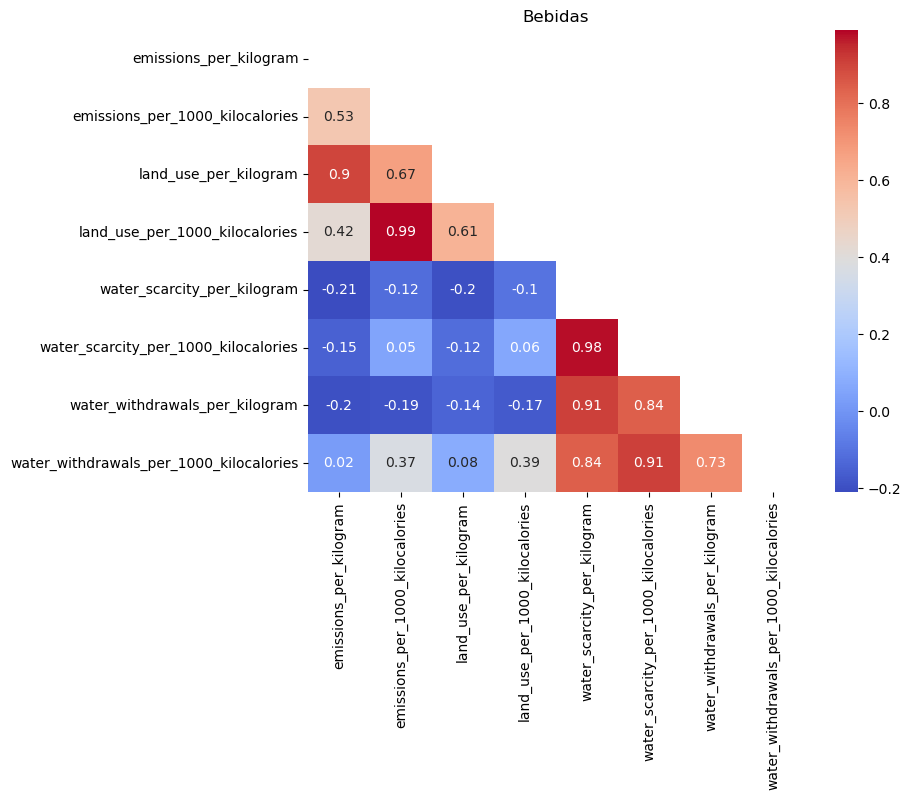

In [31]:
plt.figure(figsize=(8, 6))


mask = np.zeros_like(drink)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(drink, annot=True, cmap='coolwarm',mask=mask)

# Personalizar el mapa de calor
plt.title('Bebidas')
plt.show()

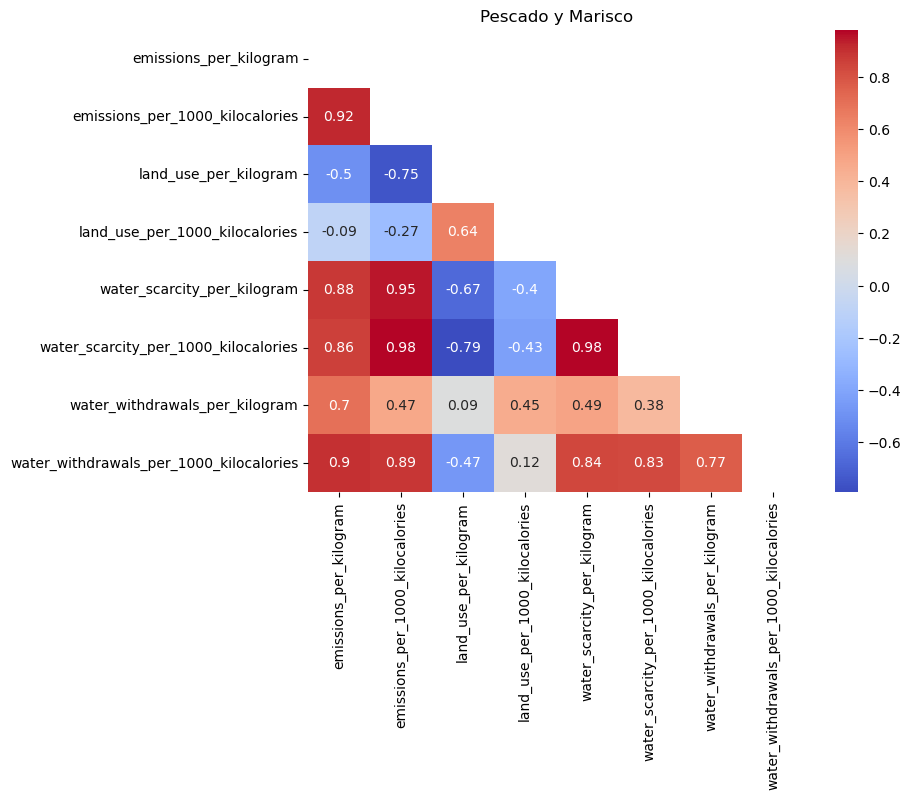

In [32]:
plt.figure(figsize=(8, 6))


mask = np.zeros_like(fish)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(fish, annot=True, cmap='coolwarm',mask=mask)

# Personalizar el mapa de calor
plt.title('Pescado y Marisco')
plt.show()

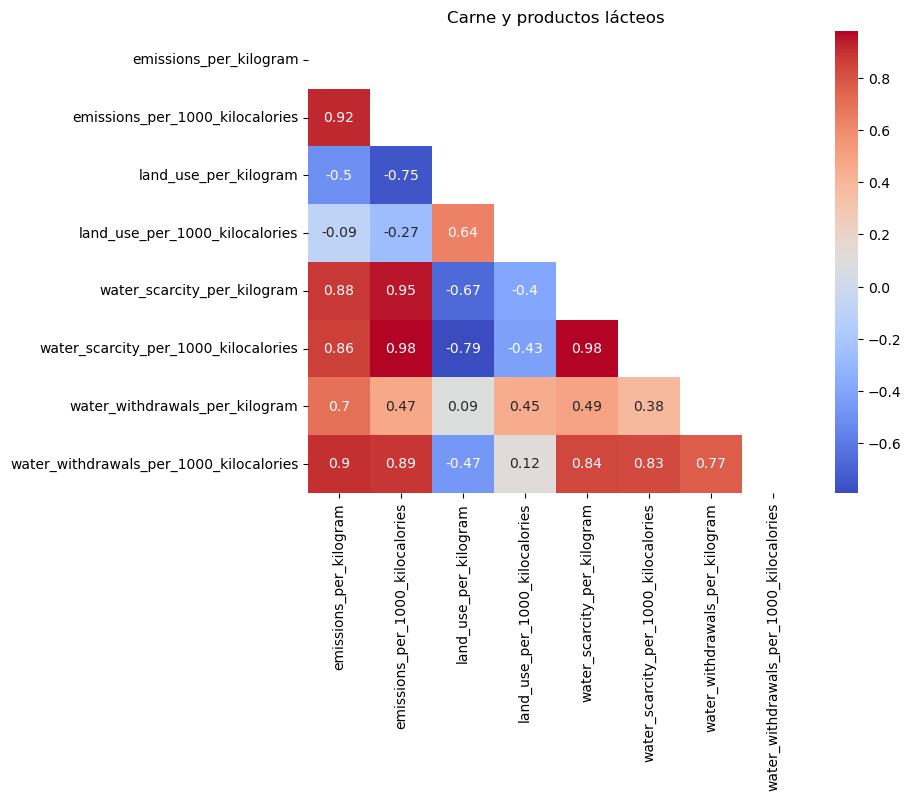

In [33]:
plt.figure(figsize=(8, 6))


mask = np.zeros_like(carne)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(fish, annot=True, cmap='coolwarm',mask=mask)

# Personalizar el mapa de calor
plt.title('Carne y productos lácteos')
plt.show()

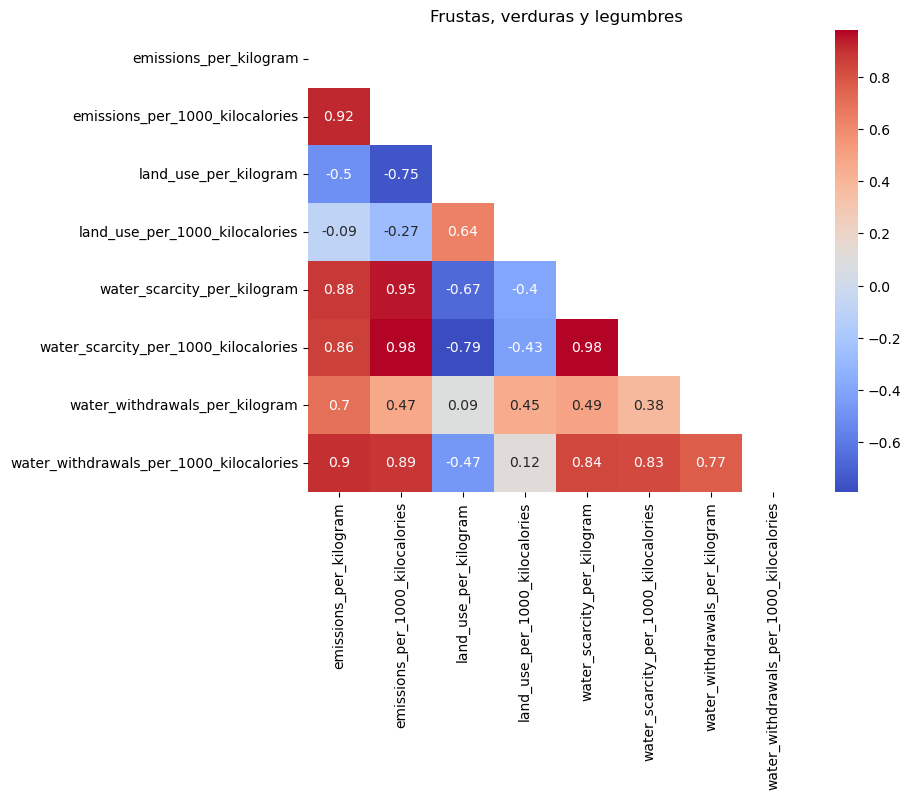

In [34]:
plt.figure(figsize=(8, 6))


mask = np.zeros_like(fru)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(fish, annot=True, cmap='coolwarm',mask=mask)

# Personalizar el mapa de calor
plt.title('Frustas, verduras y legumbres')
plt.show()

# Guardo los archivos para utilizarlos como material para SQL

In [35]:
df_frutas_verduras.to_csv('Fru.csv') 
df_fish.to_csv('Fish.csv') 
df_bebidas.to_csv('Bebidas.csv') 
df_carne.to_csv('Meat.csv' ) 